In [1]:
#Задание 1
#Импортируйте библиотеки pandas, numpy и matplotlib.
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
#Создайте датафреймы X и y из этих данных.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
signs = boston["feature_names"]
signs

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
X = pd.DataFrame(boston["data"], columns=signs)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = pd.DataFrame(boston["target"], columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
#с помощью функции train_test_split так, чтобы размер тестовой выборки
#составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
#Масштабируйте данные с помощью StandardScaler.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [7]:
#Постройте модель TSNE на тренировочный данных с параметрами:
#n_components=2, learning_rate=250, random_state=42.

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

(404, 2)

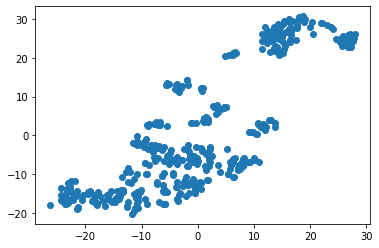

In [8]:
#Постройте диаграмму рассеяния на этих данных.

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [9]:
#Задание 2
#С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
#используйте все признаки из датафрейма X_train.
#Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

from sklearn.cluster import KMeans
model_KMeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model_KMeans.fit_predict(X_train_scaled)
print(labels_train.shape)
print(labels_train)

(404,)
[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0 2 2 1 1 2 0 0
 2 2 0 0 2 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 0 2 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 0 2 1 1 2 1 2 0 0 0 2 2 0 2 2 2 1
 0 2 0 0 1 1 1 2 2 2 1 1 2 0 1 1 0 0 1 0 2 2 2 2 1 2 0 2 1 2 1 2 2 2 1 2 2
 2 2 2 1 0 2 0 1 1 1 1 1 0 2 1 2 1 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 2 2 1 2 1
 1 0 0 1 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 0 2 2 2 2 0 2 1 2 1 0 1 2 1 1 1
 1 2 2 0 0 2 0 2 1 2 2 2 2 2 1 1 0 2 2 0 0 1 1 2 0 1 1 2 0 0 1 2 0 1 2 2 1
 2 1 2 2 0 2 2 2 2 2 2 0 1 2 1 2 2 0 2 1 1 0 1 2 1 2 2 1 0 0 2 1 0 1 1 1 2
 0 1 2 2 2 2 2 2 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 1 2 1 0 2 2 1 2 1
 1 2 2 1 0 2 2 0 2 2 2 1 2 2 2 2 1 2 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 0 1 0 1 2 1 0 2 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 0 2 2 2 0 1 2]


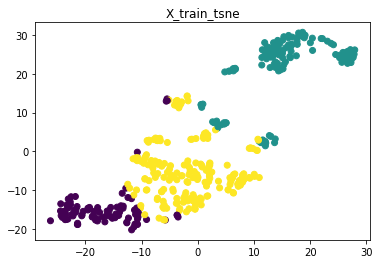

In [10]:
#Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
#и раскрасьте точки из разных кластеров разными цветами.

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.title("X_train_tsne")
plt.show()

In [11]:
print(f'Кластер 1: y_train {y_train["price"][labels_train == 0].mean()}, X_train["CRIM"] {X_train["CRIM"][labels_train == 0].mean()}')
print(f'Кластер 2: y_train {y_train["price"][labels_train == 1].mean()}, X_train["CRIM"] {X_train["CRIM"][labels_train == 1].mean()}')
print(f'Кластер 3: y_train {y_train["price"][labels_train == 2].mean()}, X_train["CRIM"] {X_train["CRIM"][labels_train == 2].mean()}')


Кластер 1: y_train 27.788372093023252, X_train["CRIM"] 0.07356558139534886
Кластер 2: y_train 16.165354330708666, X_train["CRIM"] 10.797028425196853
Кластер 3: y_train 24.958115183246072, X_train["CRIM"] 0.42166020942408367


In [12]:
#  *Задание 3
#Примените модель KMeans, построенную в предыдущем задании,
#к данным из тестового набора.
#Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [13]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

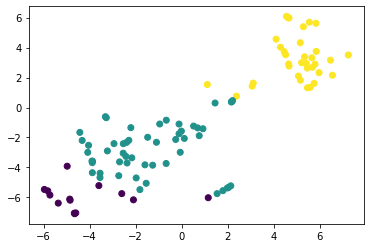

In [14]:
labels_test = model_KMeans.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [15]:
print(f'Кластер 1: y_train {y_train["price"][labels_train == 0].mean()}, X_train["CRIM"] {X_train["CRIM"][labels_train == 0].mean()}')
print(f'Кластер 2: y_train {y_train["price"][labels_train == 1].mean()}, X_train["CRIM"] {X_train["CRIM"][labels_train == 1].mean()}')
print(f'Кластер 3: y_train {y_train["price"][labels_train == 2].mean()}, X_train["CRIM"] {X_train["CRIM"][labels_train == 2].mean()}')


Кластер 1: y_train 27.788372093023252, X_train["CRIM"] 0.07356558139534886
Кластер 2: y_train 16.165354330708666, X_train["CRIM"] 10.797028425196853
Кластер 3: y_train 24.958115183246072, X_train["CRIM"] 0.42166020942408367
